# Introduction: Time Series Analysis Project

This dataset provides data from 1st May 1855 to 1st September 2013 in the States of the Countries. In this project we will discuss and do Climate Change Prediction using time series analysis on how the climate had changed through these years. The 2 parameters here are AverageTemperature, AverageTemperatureUncertainty.

In [2]:
# Import numpy, pandas for data manipulation
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta

# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exploratory Data Analysis

## Read in Data and Examine

In [3]:
# Import the data
df = pd.read_csv("GlobalLandTemperaturesByState.csv") 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [5]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [6]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China
645674,2013-09-01,NaN,NaN,Zhejiang,China


In [7]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [8]:
# Check the shape of the dataset
df.shape

(645675, 5)

In [9]:
#checking for any null values
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [10]:
df = df.dropna(how= 'any',axis=0)

In [11]:
df.shape

(620027, 5)

In [12]:
df.rename(columns={'dt':'Date', 'AverageTemperature':'Avg_temp', 'AverageTemperatureUncertainty':'confidence_interval_temp'}, inplace=True)
df.head()

,Date,Avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [13]:
df.head(100)

,Date,Avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
343,1883-12-01,25.508,1.034,Acre,Brazil
344,1884-01-01,25.195,1.202,Acre,Brazil
345,1884-02-01,25.300,0.995,Acre,Brazil
346,1884-03-01,24.807,1.173,Acre,Brazil


now we need to transform the date into a datetime object and set it as an index

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In order to get more information, Python Pandas library provides a 'describe' function to show the count, mean, standard deviation, min/ max value and the quantiles of our dataset:

In [15]:
df.describe()

,Avg_temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [16]:
df['Year'] = df.index.year
df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [17]:
df.head(100)

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855
...,...,...,...,...,...
1883-12-01,25.508,1.034,Acre,Brazil,1883
1884-01-01,25.195,1.202,Acre,Brazil,1884
1884-02-01,25.300,0.995,Acre,Brazil,1884


In [18]:
df.describe()

,Avg_temp,confidence_interval_temp,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


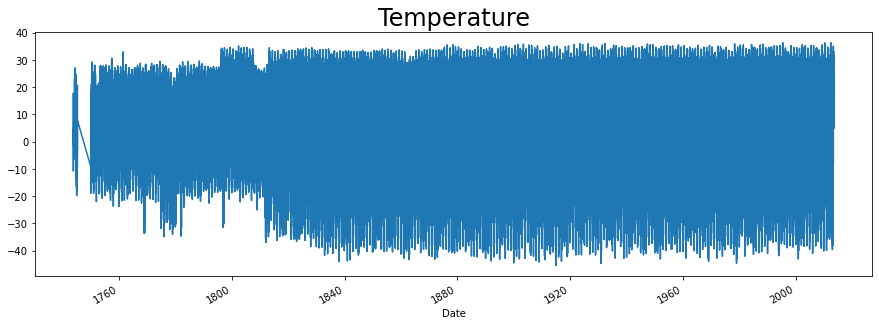

In [19]:
import matplotlib.pyplot as plt
df["Avg_temp"].plot(figsize=(15,5))
plt.title("Temperature",size=24)
plt.show()

as we can see,our data seems to be stationary, is shows kinda of a constant mean and variance. we can also witness the seasonality throught out the year with the temprature being at its lowest at the begging and end of each year, and at its highest in the middle of the year.

In [20]:
# Select the subset data from 2005 to 2010
latest_df = df.loc['1980':'2013']
# Inspect first 5 rows of the data
latest_df.head(100)

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980
...,...,...,...,...,...
1987-12-01,26.793,0.236,Acre,Brazil,1987
1988-01-01,26.722,0.240,Acre,Brazil,1988
1988-02-01,26.845,0.455,Acre,Brazil,1988


For simplicity, the latest_df column above shows the average temperatures for the first 5 months of 1980 and last 5 months of 1988 according to the dataset.

In [21]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


In [22]:
resample_df = latest_df[['Avg_temp']].resample('A').mean()

In [23]:
resample_df.head()

,Avg_temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


## Data Visualization 

Let’s explore this time series as a data visualization:

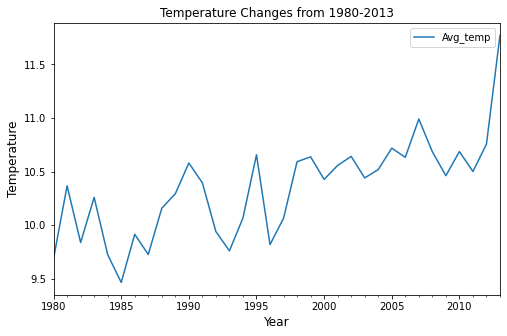

In [24]:
resample_df.plot(title='Temperature Changes from 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [25]:
from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results:')
test_df = adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(test_df[0:4], index=['Test Statistic','p-value','Lags Used','Numberr of Observations Used'])
for key, value in test_df[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Results:
Test Statistic                  -0.728209
p-value                          0.839307
Lags Used                        2.000000
Numberr of Observations Used    31.000000
Critical Value (1%)             -3.661429
Critical Value (5%)             -2.960525
Critical Value (10%)            -2.619319
dtype: float64


In [26]:
decomp = seasonal_decompose(resample_df,period=3)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

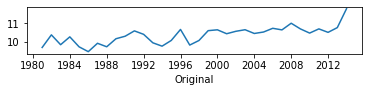

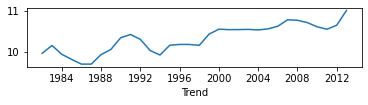

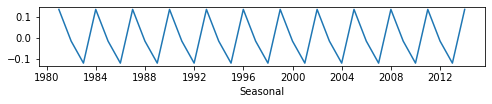

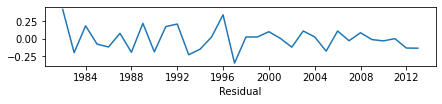

<Figure size 648x360 with 0 Axes>

In [27]:
#Plotting the Original Time Series
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

#Plotting the Trend Component
plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(8,5))

#Plotting the Seasonal Component
plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(7,5))

#Plotting the Residual Component
plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(9,5))

plt.tight_layout()

from decomposing our data, we can see that we have a strong seasonality and no trend at all since our data is stationary and has a constant mean.

we can witness the residuals clearly here from our decomposition.

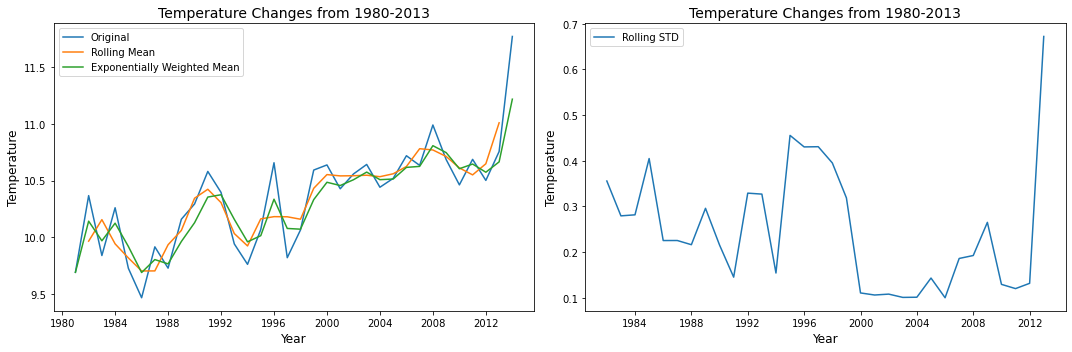

In [28]:
rol_mean = resample_df.rolling(window=3, center=True).mean()

#Exponentially Weighted Mean
ewm = resample_df.ewm(span=3).mean()

#Rolling Standard Deviation
rol_std = resample_df.rolling(window=3, center =True).std()

#Creating Subplots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

#Temperature graph with Rolling Mean and Exponentially Weighted Mean 
ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm, label='Exponentially Weighted Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

#Temperature graph with Rolling STD
ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [29]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

print ('Dickey-Fuller Test for the Rolling Mean:')
df_test = adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistics','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)
print('')
print('Dickey-Fuller Test for the Exponentially Weighted Mean:')
df_test = adfuller(ewm.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistics                 0.275101
p-value                         0.976173
Lags Used                       8.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                 -0.338693
p-value                         0.919843
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [30]:
diff_rol_mean = resample_df = rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
1981-12-31,9.964797
1982-12-31,10.154684
1983-12-31,9.940808
1984-12-31,9.816634
1985-12-31,9.701635


In [31]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_temp
Date,
1981-12-31,-0.176207
1982-12-31,0.186849
1983-12-31,-0.182590
1984-12-31,-0.101114
1985-12-31,0.013633


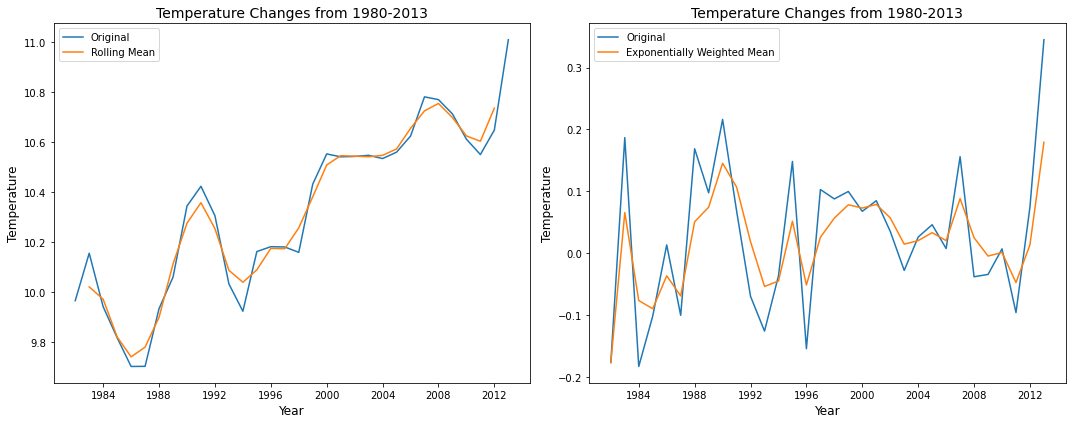

In [32]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3, center=True).mean()

#Exponentially Weighted Mean of the difference
df_ewm_diff = diff_ewm.ewm(span=3).mean()

#Creating Subplots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

#Difference graph with the Rolling Mean
ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

#Difference graph with Exponentially Weighted Mean
ax2.plot(diff_ewm, label='Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()

In [33]:
print ('Dickey-Fuller Test for the Difference between the Original and Rolling Mean:')
dftest = adfuller(diff_rol_mean.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistc','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
print('')
print('Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:')
dftest = adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-values','Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test for the Difference between the Original and Rolling Mean:
Test Statistc                   0.275101
p-value                         0.976173
Lags Used                       8.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:
Test Statistic                 -5.312979
p-values                        0.000005
Lags Used                       0.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


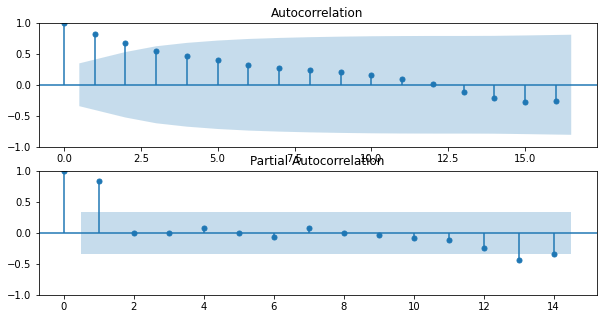

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

#plot the Autocorrelation graph
pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df, ax=pyplot.gca(), lags=14)
pyplot.show()

In [35]:
from pmdarima import auto_arima

In [36]:
auto_arima(resample_df,seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  26.109
Date:                Sun, 30 Apr 2023   AIC                            -40.219
Time:                        10:03:52   BIC                            -31.615
Sample:                    12-31-1981   HQIC                           -37.414
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0198      0.004      5.424      0.000       0.013       0.027
ar.L1          1.2959      0.171      7.591      0.000       0.961       1.631
ar.L2         -0.8554      0.145     -5.912      0.000      -1.139      -0.572
ma.L1         -1.4442      0.225     -6.415      0.000      -1.885      -1.003
ma.L2          0.4939      0.192      2.573      0.010       0.118       0.870
sigma2         0.0100      0.004      2.637      0.008       0.003       0.017
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.77   Prob(JB):                         0.71
Heteroskedasticity (H):               0.70   Skew:                            -0.16
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
#ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [38]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(620027, 5)
(619997, 5) (30, 5)


In [39]:
n=len(resample_df)
n

32

In [40]:
start_index = n-12
start_index

20

In [41]:
df_training = resample_df.iloc[:start_index]
df_test = resample_df.iloc[start_index:]
df_training.tail()

,Avg_temp
Date,
1996-12-31,10.179805
1997-12-31,10.158309
1998-12-31,10.431204
1999-12-31,10.552186
2000-12-31,10.540656


In [42]:
len(df_training)

20

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
model = SARIMAX(df_training['Avg_temp'],order=(2,0,0),seasonal_order=(1,1,0,12))
results = model.fit()
results.summary()

C:\Users\venu babu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\venu babu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Avg_temp   No. Observations:                   20
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood                   3.433
Date:                            Sun, 30 Apr 2023   AIC                              1.133
Time:                                    10:03:54   BIC                              1.451
Sample:                                12-31-1981   HQIC                            -1.010
                                     - 12-31-2000                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3264      5.357      0.248      0.804      -9.173      11.826
ar.L2         -0.3487      1.151     -0.303      0.762      -2.604       1.906
ar.S.L12      -0.9895      2.393     -0.414      0.679      -5.679       3.700
sigma2         0.0004      0.096      0.005      0.996      -0.188       0.189
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.57   Prob(JB):                         0.82
Heteroskedasticity (H):               2.08   Skew:                             0.39
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
#obtain predicted value and performance measures
start=len(df_training)
end=len(df_training)+len(df_test)-1
predictions = results.predict(start=start, end=end, dynamic=False, type='level')
#rename ('SARIMA (2,0,0)(1,1,0,12) predictions')

<AxesSubplot:xlabel='Date'>

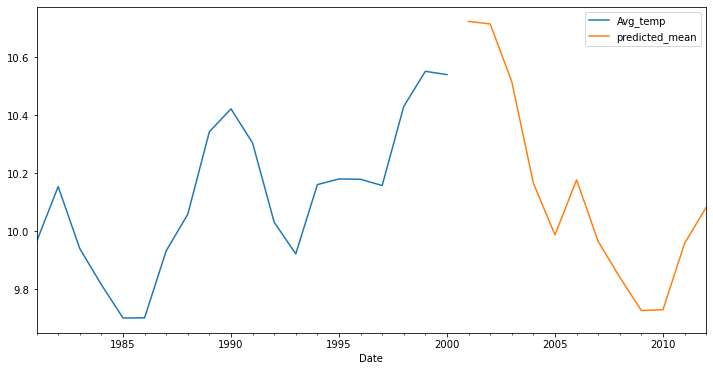

In [46]:
df_training.plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

In [47]:
#predicted within the test set only
predictions

2001-12-31    10.723996
2002-12-31    10.715585
2003-12-31    10.516551
2004-12-31    10.166462
2005-12-31     9.988308
2006-12-31    10.177871
2007-12-31     9.965639
2008-12-31     9.841978
2009-12-31     9.727210
2010-12-31     9.729872
2011-12-31     9.958893
2012-12-31    10.083006
Freq: A-DEC, Name: predicted_mean, dtype: float64